In [ ]:
pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.0 MB/s eta 0:00:00


In [ ]:
from google.colab import files

uploaded = files.upload()

Saving dataset.csv.csv to dataset.csv.csv


In [ ]:
from google.colab import files

uploaded = files.upload()

Saving stopwords.txt to stopwords.txt


In [ ]:
import pandas as pd
import re
from nltk.stem import SnowballStemmer
from sklearn import model_selection
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import RandomOverSampler

In [ ]:
# Load dataset
data = pd.read_csv('dataset.csv.csv', encoding='latin-1')

# Load stopwords
id_stopword_dict = pd.read_csv('stopwords.txt', header=None)
id_stopword_dict = id_stopword_dict.rename(columns={0: 'stopword'})

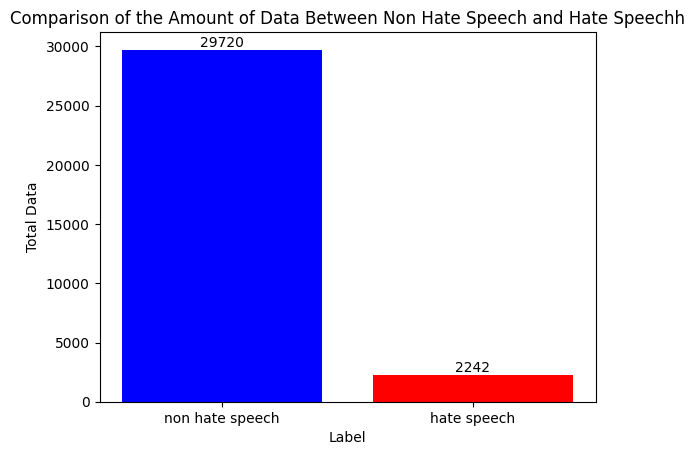

In [ ]:
import matplotlib.pyplot as plt

# Misalkan data.label adalah list yang berisi label-label
labels = data.label

# Ubah label menjadi keterangan yang diinginkan
labels_text = ['non hate speech' if label == 0 else 'hate speech' for label in labels]

# Hitung jumlah data untuk setiap kategori
non_hate_speech_count = labels_text.count('non hate speech')
hate_speech_count = labels_text.count('hate speech')

# Plot histogram dengan keterangan label
plt.bar(['non hate speech', 'hate speech'], [non_hate_speech_count, hate_speech_count], color=['blue', 'red'])
plt.xlabel('Label')
plt.ylabel('Total Data')
plt.title('Comparison of the Amount of Data Between Non Hate Speech and Hate Speechh')

# Tambahkan keterangan data di atas setiap bar
plt.text('non hate speech', non_hate_speech_count, str(non_hate_speech_count), ha='center', va='bottom')
plt.text('hate speech', hate_speech_count, str(hate_speech_count), ha='center', va='bottom')

plt.show()


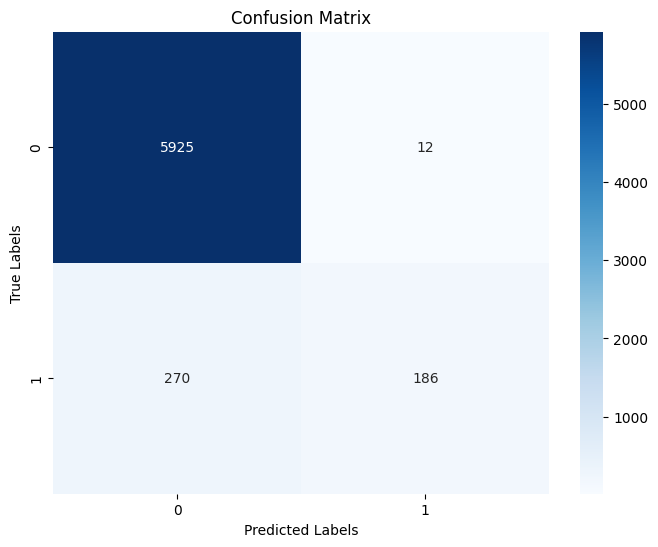

SVM Accuracy Score:  95.58892538714218
SVM Recall Score:  40.78947368421053
SVM Precision Score:  93.93939393939394
SVM F1 Score:  56.88073394495412


In [ ]:
# SVM sebelum antara data hs dan non hs seimbang

# Load stopwords
id_stopword_dict = pd.read_csv('stopwords.txt', header=None)
id_stopword_dict = id_stopword_dict.rename(columns={0: 'stopword'})

# Preprocessing steps
snowball_stemmer = SnowballStemmer('english')  # Pilih bahasa yang sesuai

def lowercase(text):
    return text.lower()

def remove_unnecessary_char(text):
    text = re.sub('\n', ' ', text)
    text = re.sub('rt', ' ', text)
    text = re.sub('user', ' ', text)
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))',' ', text)
    text = re.sub('  +', ' ', text)
    return text

def remove_nonalphanumeric(text):
    text = re.sub('[^0-9a-zA-Z]+',' ', text)
    return text

def remove_stopword(text):
    text = ' '.join(['' if word in id_stopword_dict.stopword.values else word for word in text.split(' ')])
    text = re.sub('  +', ' ', text)
    text = text.strip()
    return text

def stemming(text):
    return ' '.join([snowball_stemmer.stem(word) for word in text.split()])

def preprocess(text):
    text = lowercase(text)
    text = remove_unnecessary_char(text)
    text = remove_nonalphanumeric(text)
    text = stemming(text)
    text = remove_stopword(text)
    return text

# Apply preprocessing to the dataset
data['preprocessed_tweet'] = data['tweet'].apply(preprocess)

# Split data into training and testing sets
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(data['preprocessed_tweet'], data['label'], test_size=0.2, random_state=42)

# Encode labels
Encoder = LabelEncoder()
Train_Y = Encoder.fit_transform(Train_Y)
Test_Y = Encoder.transform(Test_Y)

# Convert text data to TF-IDF vectors
Tfidf_vect = TfidfVectorizer()
Tfidf_vect.fit(data['preprocessed_tweet'])

Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)

# Train SVM classifier
svm_classifier = SVC()
svm_classifier.fit(Train_X_Tfidf, Train_Y)

# Make predictions
predictions_SVM = svm_classifier.predict(Test_X_Tfidf)

conf_matrix = confusion_matrix(Test_Y, predictions_SVM)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g',
            xticklabels=Encoder.classes_, yticklabels=Encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

print("SVM Accuracy Score: ", accuracy_score(Test_Y, predictions_SVM) * 100)
print("SVM Recall Score: ", recall_score(Test_Y, predictions_SVM) * 100)
print("SVM Precision Score: ", precision_score(Test_Y, predictions_SVM) * 100)
print("SVM F1 Score: ", f1_score(Test_Y, predictions_SVM) * 100)

In [ ]:
# SVM setelah antara data hs dan non hs seimbang

# Load stopwords
id_stopword_dict = pd.read_csv('stopwords.txt', header=None)
id_stopword_dict = id_stopword_dict.rename(columns={0: 'stopword'})

# Preprocessing steps
snowball_stemmer = SnowballStemmer('english')  # Pilih bahasa yang sesuai

def lowercase(text):
    return text.lower()

def remove_unnecessary_char(text):
    text = re.sub('\n', ' ', text)
    text = re.sub('rt', ' ', text)
    text = re.sub('user', ' ', text)
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))',' ', text)
    text = re.sub('  +', ' ', text)
    return text

def remove_nonalphanumeric(text):
    text = re.sub('[^0-9a-zA-Z]+',' ', text)
    return text

def remove_stopword(text):
    text = ' '.join(['' if word in id_stopword_dict.stopword.values else word for word in text.split(' ')])
    text = re.sub('  +', ' ', text)
    text = text.strip()
    return text

def stemming(text):
    return ' '.join([snowball_stemmer.stem(word) for word in text.split()])

def preprocess(text):
    text = remove_nonalphanumeric(text)
    text = remove_unnecessary_char(text)
    text = lowercase(text)
    text = stemming(text)
    text = remove_stopword(text)
    return text

# Apply preprocessing to the dataset
data['preprocessed_tweet'] = data['tweet'].apply(preprocess)

# Split data into training and testing sets
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(data['preprocessed_tweet'], data['label'], test_size=0.2, random_state=42)

# Encode labels
Encoder = LabelEncoder()
Train_Y = Encoder.fit_transform(Train_Y)
Test_Y = Encoder.transform(Test_Y)

# Convert text data to TF-IDF vectors
Tfidf_vect = TfidfVectorizer()
Tfidf_vect.fit(data['preprocessed_tweet'])

Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)

# Handling class imbalance using RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority')
Train_X_resampled, Train_Y_resampled = oversample.fit_resample(Train_X_Tfidf, Train_Y)

# Train SVM classifier
svm_classifier = SVC(C=1.0, kernel='rbf', gamma='scale')
svm_classifier.fit(Train_X_resampled, Train_Y_resampled)

# Make predictions
predictions_SVM = svm_classifier.predict(Test_X_Tfidf)

conf_matrix = confusion_matrix(Test_Y, predictions_SVM)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g',
            xticklabels=Encoder.classes_, yticklabels=Encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Evaluate the model
print("SVM Accuracy Score: ", accuracy_score(Test_Y, predicitions_SVM) * 100)
print("SVM Recall Score: ", recall_score(Test_Y, predicitions_SVM, average='weighted') * 100)
print("SVM Precision Score: ", precision_score(Test_Y, predicitions_SVM, average='weighted') * 100)
print("SVM F1 Score: ", f1_score(Test_Y, predicitions_SVM, average='weighted') * 100)


NameError: name 'pd' is not defined

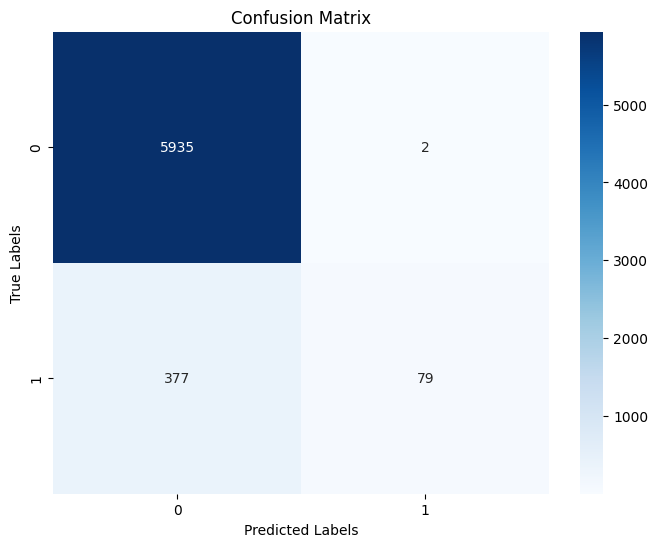

k-NN Accuracy Score:  94.07164085718755
k-NN Recall Score:  17.324561403508774
k-NN Precision Score:  97.53086419753086
k-NN F1 Score:  29.42271880819367


In [ ]:
# Load stopwords
id_stopword_dict = pd.read_csv('stopwords.txt', header=None)
id_stopword_dict = id_stopword_dict.rename(columns={0: 'stopword'})

# Preprocessing steps
snowball_stemmer = SnowballStemmer('english')  # Choose appropriate language

def lowercase(text):
    return text.lower()

def remove_unnecessary_char(text):
    text = re.sub('\n', ' ', text)
    text = re.sub('rt', ' ', text)
    text = re.sub('user', ' ', text)
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))',' ', text)
    text = re.sub('  +', ' ', text)
    return text

def remove_nonalphanumeric(text):
    text = re.sub('[^0-9a-zA-Z]+',' ', text)
    return text

def remove_stopword(text):
    text = ' '.join(['' if word in id_stopword_dict.stopword.values else word for word in text.split(' ')])
    text = re.sub('  +', ' ', text)
    text = text.strip()
    return text

def stemming(text):
    return ' '.join([snowball_stemmer.stem(word) for word in text.split()])

def preprocess(text):
    text = lowercase(text)
    text = remove_unnecessary_char(text)
    text = remove_nonalphanumeric(text)
    text = stemming(text)
    text = remove_stopword(text)
    return text

# Apply preprocessing to the dataset
data['preprocessed_tweet'] = data['tweet'].apply(preprocess)

# Split data into training and testing sets
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(data['preprocessed_tweet'], data['label'], test_size=0.2, random_state=42)

# Encode labels
Encoder = LabelEncoder()
Train_Y = Encoder.fit_transform(Train_Y)
Test_Y = Encoder.transform(Test_Y)

# Convert text data to TF-IDF vectors
Tfidf_vect = TfidfVectorizer()
Tfidf_vect.fit(data['preprocessed_tweet'])

Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)

# Train k-NN classifier without handling class imbalance
knn_classifier = KNeighborsClassifier(n_neighbors=5) # You can adjust the number of neighbors
knn_classifier.fit(Train_X_Tfidf, Train_Y)

# Make predictions
predictions_knn = knn_classifier.predict(Test_X_Tfidf)

conf_matrix = confusion_matrix(Test_Y, predictions_knn)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g',
            xticklabels=Encoder.classes_, yticklabels=Encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Evaluate the model
print("k-NN Accuracy Score: ", accuracy_score(Test_Y, predictions_knn) * 100)
print("k-NN Recall Score: ", recall_score(Test_Y, predictions_knn) * 100)
print("k-NN Precision Score: ", precision_score(Test_Y, predictions_knn) * 100)
print("k-NN F1 Score: ", f1_score(Test_Y, predictions_knn) * 100)


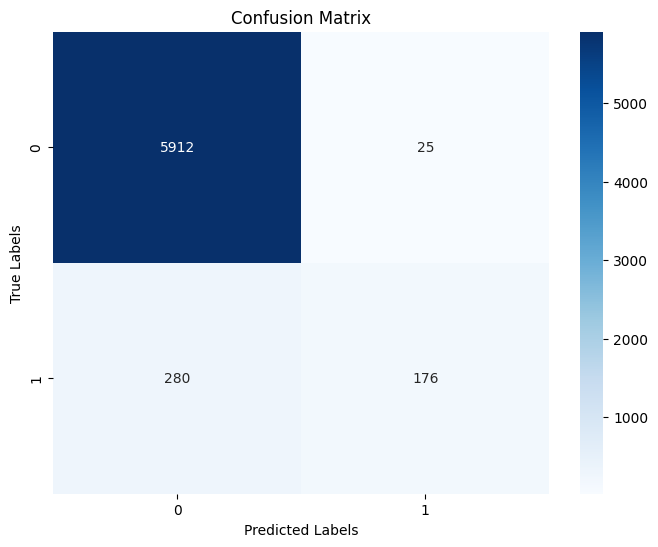

k-NN Accuracy Score:  95.22915689034882
k-NN Recall Score:  95.22915689034882
k-NN Precision Score:  94.91341451339733
k-NN F1 Score:  94.35345942556047


In [ ]:
# Preprocessing steps
snowball_stemmer = SnowballStemmer('english')

def lowercase(text):
    return text.lower()

def remove_unnecessary_char(text):
    text = re.sub('\n', ' ', text)
    text = re.sub('rt', ' ', text)
    text = re.sub('user', ' ', text)
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))',' ', text)
    text = re.sub('  +', ' ', text)
    return text

def remove_nonalphanumeric(text):
    text = re.sub('[^0-9a-zA-Z]+',' ', text)
    return text

def remove_stopword(text):
    text = ' '.join(['' if word in id_stopword_dict.stopword.values else word for word in text.split(' ')])
    text = re.sub('  +', ' ', text)
    text = text.strip()
    return text

def stemming(text):
    return ' '.join([snowball_stemmer.stem(word) for word in text.split()])

def preprocess(text):
    text = lowercase(text)
    text = remove_unnecessary_char(text)
    text = remove_nonalphanumeric(text)
    text = stemming(text)
    text = remove_stopword(text)
    return text

# Apply preprocessing to the dataset
data['preprocessed_tweet'] = data['tweet'].apply(preprocess)

# Split data into training and testing sets
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(data['preprocessed_tweet'], data['label'], test_size=0.2, random_state=42)

# Encode labels
Encoder = LabelEncoder()
Train_Y = Encoder.fit_transform(Train_Y)
Test_Y = Encoder.transform(Test_Y)

# Convert text data to TF-IDF vectors
Tfidf_vect = TfidfVectorizer()
Tfidf_vect.fit(data['preprocessed_tweet'])

Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)

# Handling class imbalance using RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority')
Train_X_resampled, Train_Y_resampled = oversample.fit_resample(Train_X_Tfidf, Train_Y)

# Train k-NN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5) # You can adjust the number of neighbors
knn_classifier.fit(Train_X_resampled, Train_Y_resampled)

# Make predictions
predictions_knn = knn_classifier.predict(Test_X_Tfidf)

conf_matrix = confusion_matrix(Test_Y, predictions_knn)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g',
            xticklabels=Encoder.classes_, yticklabels=Encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Evaluate the model
print("k-NN Accuracy Score: ", accuracy_score(Test_Y, predictions_knn) * 100)
print("k-NN Recall Score: ", recall_score(Test_Y, predictions_knn, average='weighted') * 100)
print("k-NN Precision Score: ", precision_score(Test_Y, predictions_knn, average='weighted') * 100)
print("k-NN F1 Score: ", f1_score(Test_Y, predictions_knn, average='weighted') * 100)
